In [1]:
# system library
import os
import sys
import json

# useful libraries
import math
import operator
import itertools
import statistics
import collections
from collections import Counter
from collections import OrderedDict

# pandas
import pandas as pd

# numpy
import numpy as np
from numpy import std
from numpy import mean
from numpy import percentile

# visualisarion
import pydotplus
import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import Image

# sklearn
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

# dimensional reducers
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif  # classification
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression  # regression

# scalers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder

# performance visualisation 
from sklearn import tree
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from sklearn.model_selection import learning_curve
from mlxtend.plotting import plot_decision_regions
from yellowbrick.model_selection import LearningCurve

# tree classifiers
from sklearn.tree import DecisionTreeClassifier

# linear classifiers
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# neighbors classifiers
from sklearn.neighbors import KNeighborsClassifier

# naive_bayes classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# ensemble classifiers
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

from yellowbrick.style import set_palette
set_palette('bold')

# Dataset loading singolo file

In [2]:
y_train = pd.read_csv('Dataset/train/y_train.txt', header = None, names = ['Activity'])
#y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})


In [3]:
X_trainx = pd.read_csv('Dataset/train/Inertial Signals/body_acc_x_train.txt', header=None, delim_whitespace=True)
# add subject column to the dataframe
X_trainx['subject'] = pd.read_csv('Dataset/train/subject_train.txt', header=None)

# put all columns in a single dataframe
dfx = X_trainx
dfx['Activity'] = y_train
#df['ActivityName'] = y_train_labels

print('df: {}'.format(dfx.shape))

df: (7352, 130)


In [7]:
X_trainx

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,subject,Activity
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576,1,5
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599,1,5
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178,1,5
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028,1,5
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.388873,0.618763,0.774067,0.586568,0.217007,-0.027330,-0.171294,-0.218988,-0.137680,0.033094,...,-0.227710,-0.210942,-0.179295,-0.142085,-0.131831,-0.154000,-0.176886,-0.211068,30,2
7348,0.711864,0.709237,0.321368,-0.028921,-0.208107,-0.192802,-0.066754,-0.042285,0.058089,0.106855,...,-0.274100,-0.326159,-0.379539,-0.382544,-0.371156,-0.295357,-0.203831,-0.124548,30,2
7349,-0.226717,-0.177817,-0.150869,-0.132237,-0.068338,0.007874,0.096481,0.205834,0.441342,0.662930,...,-0.313892,-0.367070,-0.395135,-0.347338,-0.319902,-0.294935,-0.243403,-0.215215,30,2
7350,-0.064806,-0.079933,-0.068350,-0.038477,-0.028679,0.018335,0.077571,0.253580,0.507805,0.583999,...,-0.396854,-0.413906,-0.379085,-0.356609,-0.317618,-0.315016,-0.330737,-0.272348,30,2


In [4]:
X_trainy = pd.read_csv('Dataset/train/Inertial Signals/body_acc_y_train.txt', header=None, delim_whitespace=True)
# add subject column to the dataframe
X_trainy['subject'] = pd.read_csv('Dataset/train/subject_train.txt', header=None)

# put all columns in a single dataframe
dfy = X_trainy
dfy['Activity'] = y_train
#df['ActivityName'] = y_train_labels

print('df: {}'.format(dfy.shape))

df: (7352, 130)


In [5]:
X_trainz = pd.read_csv('Dataset/train/Inertial Signals/body_acc_z_train.txt', header=None, delim_whitespace=True)
# add subject column to the dataframe
X_trainz['subject'] = pd.read_csv('Dataset/train/subject_train.txt', header=None)

# put all columns in a single dataframe
dfz = X_trainz
dfz['Activity'] = y_train
#df['ActivityName'] = y_train_labels

print('df: {}'.format(dfz.shape))

df: (7352, 130)


In [6]:
X_test = pd.read_csv('../data/test/Inertial Signals/body_acc_x_test.txt', header=None, delim_whitespace=True)
y_test = pd.read_csv('../data/test/y_test.txt', header=None)

X_ts = X_test.values
y_ts = y_test.values

print('X_train and y_train : ({},{})'.format(X_ts.shape, y_ts.shape))

FileNotFoundError: [Errno 2] No such file or directory: '../data/test/Inertial Signals/body_acc_x_test.txt'

# Combine inertial signals and create a suitable data

## 1. First attempt

In [50]:
BASE_ADDRESS = 'Dataset/'
DIMENSION = ['_x_', '_y_', '_z_']
FEATURE_TYPE = ['body_acc', 'body_gyro', 'total_acc']

In [55]:
def load_data():
        def load_file(path):
            data = pd.read_csv(filepath_or_buffer=path, header=None, delim_whitespace=True)
            return data.values

        # Collect dataset filenames
        def generate_data_path(base_address, group):
            filenames = list()
            filepath = base_address + group + '/Inertial Signals/'
            for name in FEATURE_TYPE:
                for dimension in DIMENSION:
                    filenames += [filepath + name + dimension + group + '.txt']

            return filenames

        # Combine inertial signals and create a suitable data
        def combine_features(base_address, group):
            filenames = generate_data_path(base_address, group)
            combined_data = list()
            for name in filenames:
                data = load_file(name)
                combined_data.append(data)
            # Use dstack to create a 3D data like [samples, time_steps, features]
            combined_data = np.dstack(combined_data)
            return combined_data

        # Load x_train, y_train, x_test and y_test data
        def load_dataset(base_address=BASE_ADDRESS):
            x_train = combine_features(base_address, 'train')
            y_train = load_file(base_address + 'train/' + 'y_train.txt')

            x_test = combine_features(base_address, 'test')
            y_test = load_file(base_address + 'test/' + 'y_test.txt')

            # Zero-Offset
            y_test = y_test - 1
            y_train = y_train - 1

            # One-Hot encoding
            #y_test = keras.utils.to_categorical(y_test)
            #y_train = keras.utils.to_categorical(y_train)

            return x_train, y_train, x_test, y_test

        return load_dataset()

In [57]:
x_train, y_train, x_test, y_test = load_data()

In [65]:
x_train.shape #[samples, time_steps, features]

(7352, 128, 9)

In [102]:
n_time_steps = x_train.shape[1]
n_output = y_train.shape[1]
n_features = x_train.shape[2]
n_classes = _count_classes(y_train)

print('dimensione di input:', len(x_train[0][0]))
print('# di time steps:',n_time_steps)
print('# di outputs:',n_output)
print('# di features:',n_features)
print('# di classi:', n_classes)



dimensione di input: 9
# di time steps: 128
# di outputs: 1
# di features: 9
# di classi: 6


## 2. Second attempt 

In [229]:
import os

os.listdir('Dataset/train/Inertial Signals')

['body_acc_x_train.txt',
 'body_acc_y_train.txt',
 'body_acc_z_train.txt',
 'body_gyro_x_train.txt',
 'body_gyro_y_train.txt',
 'body_gyro_z_train.txt',
 'total_acc_x_train.txt',
 'total_acc_y_train.txt',
 'total_acc_z_train.txt']

In [230]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [231]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = 'Dataset/'+subset+'/Inertial Signals/'+signal+'_'+subset+'.txt'
        signals_data.append(_read_csv(filename).values) 
    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [232]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]
    
    y_ct = pd.get_dummies(y).values
    y = y.values

    return y, y_ct

In [233]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    
    y_train, y_train_ct = load_y('train')
    y_test, y_test_ct = load_y('test')

    return X_train, X_test, y_train, y_test, y_train_ct, y_test_ct

In [234]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [235]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test, Y_train_ct, Y_test_ct = load_data()
print(Y_train.shape)
print(Y_train_ct.shape)
print(X_train.shape)

(7352,)
(7352, 6)
(7352, 128, 9)


In [236]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train_ct)

print(timesteps)
print(input_dim)
print(len(X_train))
print(n_classes)

128
9
7352
6


In [272]:
X_train[7351,127, 8] 

# Access the third element of the second array of the first array:
# Accede alla 9 feature (total_acc_z_train.txt) del 128esimo time step, del 7352esimo sample

-0.08357159

In [275]:
X_train[7351][127][8]

-0.08357159

In [276]:
X_train[7351][127] 
# Accede ai valori di tutte e 9 le features del 128esimo time step del 7352esimo sample

array([-0.1709989 , -0.1313991 , -0.05112688,  1.047599  ,  1.011324  ,
       -0.335884  ,  0.8002428 , -0.3323721 , -0.08357159])

In [277]:
X_train[7351]
# Accede ai valori di tutte e 9 le features e di tutti e 128 time step del 7352esimo sample

array([[-0.1944707 , -0.09723743,  0.2030342 , ...,  0.7980909 ,
        -0.3060512 ,  0.2093865 ],
       [-0.1738025 , -0.05831043,  0.2267976 , ...,  0.8192417 ,
        -0.2666046 ,  0.2310711 ],
       [-0.1275446 ,  0.00244712,  0.3319892 , ...,  0.8658821 ,
        -0.2053607 ,  0.3341906 ],
       ...,
       [-0.07190685, -0.1943222 , -0.1275547 , ...,  0.8980947 ,
        -0.3977751 , -0.156105  ],
       [-0.1422088 , -0.1470701 , -0.09236675, ...,  0.8283723 ,
        -0.3492473 , -0.1227979 ],
       [-0.1709989 , -0.1313991 , -0.05112688, ...,  0.8002428 ,
        -0.3323721 , -0.08357159]])

# Visualizzazione dei dati

Stessa attività, assi differenti

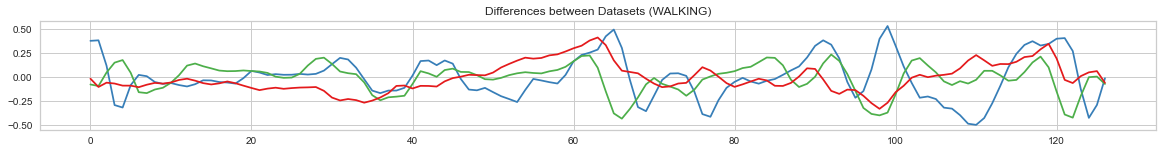

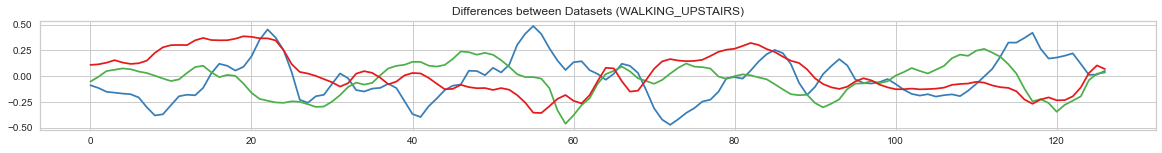

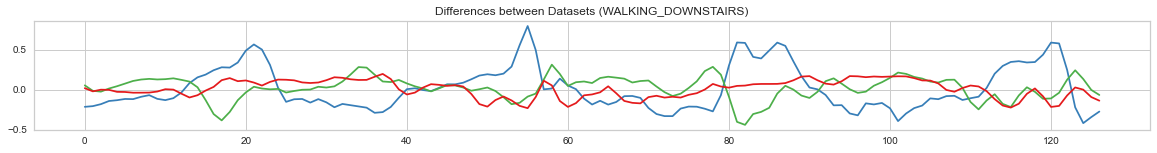

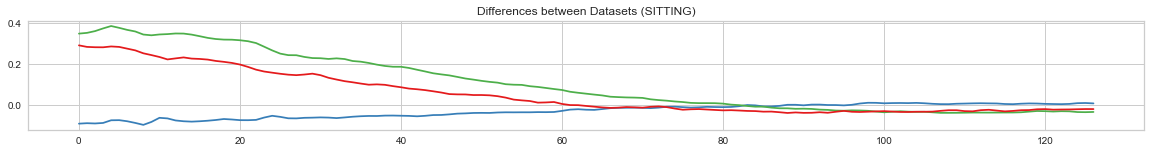

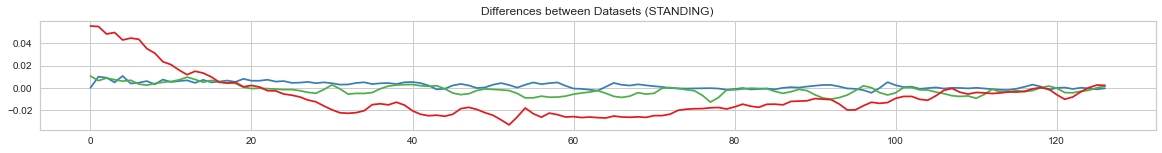

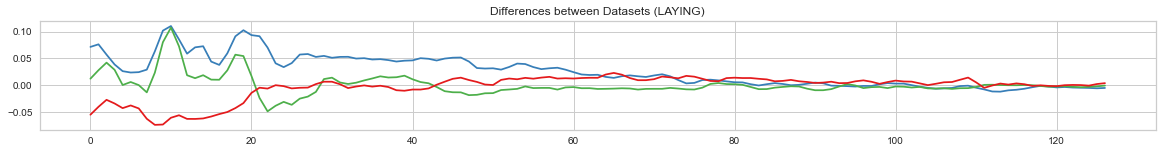

In [21]:
plt.figure(figsize=(20,2))
plt.title("Differences between Datasets (WALKING)")
X_trainx[y_train['Activity']==1].iloc[0,:127].plot()
X_trainy[y_train['Activity']==1].iloc[0,:127].plot()
X_trainz[y_train['Activity']==1].iloc[0,:127].plot()

plt.show()

plt.figure(figsize=(20,2))
plt.title("Differences between Datasets (WALKING_UPSTAIRS)")
X_trainx[y_train['Activity']==2].iloc[0,:127].plot()
X_trainy[y_train['Activity']==2].iloc[0,:127].plot()
X_trainz[y_train['Activity']==2].iloc[0,:127].plot()

plt.show()

plt.figure(figsize=(20,2))
plt.title("Differences between Datasets (WALKING_DOWNSTAIRS)")
X_trainx[y_train['Activity']==3].iloc[0,:127].plot()
X_trainy[y_train['Activity']==3].iloc[0,:127].plot()
X_trainz[y_train['Activity']==3].iloc[0,:127].plot()

plt.show()

plt.figure(figsize=(20,2))
plt.title("Differences between Datasets (SITTING)")
X_trainx[y_train['Activity']==4].iloc[0,:127].plot()
X_trainy[y_train['Activity']==4].iloc[0,:127].plot()
X_trainz[y_train['Activity']==4].iloc[0,:127].plot()

plt.show()


plt.figure(figsize=(20,2))
plt.title("Differences between Datasets (STANDING)")
X_trainx[y_train['Activity']==5].iloc[0,:127].plot()
X_trainy[y_train['Activity']==5].iloc[0,:127].plot()
X_trainz[y_train['Activity']==5].iloc[0,:127].plot()

plt.show()

plt.figure(figsize=(20,2))
plt.title("Differences between Datasets (LAYING)")
X_trainx[y_train['Activity']==6].iloc[0,:127].plot()
X_trainy[y_train['Activity']==6].iloc[0,:127].plot()
X_trainz[y_train['Activity']==6].iloc[0,:127].plot()

plt.show()

Differenze tra attività statiche e dinamiche di uno stesso soggetto (asse x)

<AxesSubplot:title={'center':'Differences between Dynamic Activities'}>

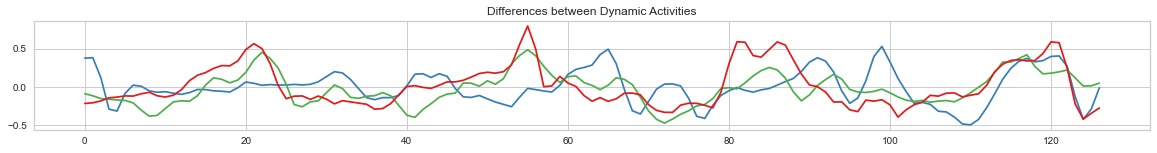

In [6]:
plt.figure(figsize=(20,2))
plt.title("Differences between Dynamic Activities")
X_trainx[y_train['Activity']==1].iloc[0,:127].plot()
X_trainx[y_train['Activity']==2].iloc[0,:127].plot()
X_trainx[y_train['Activity']==3].iloc[0,:127].plot()


<AxesSubplot:title={'center':'Differences between Static Activities'}>

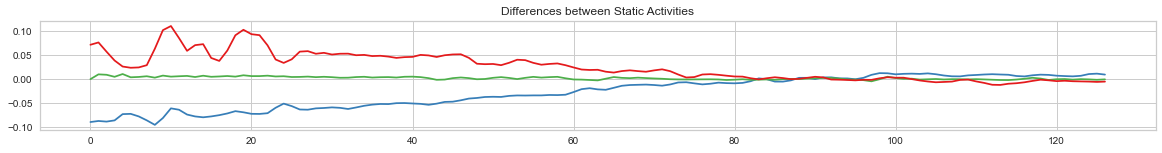

In [7]:
plt.figure(figsize=(20,2))
plt.title("Differences between Static Activities")
X_trainx[y_train['Activity']==4].iloc[0,:127].plot()
X_trainx[y_train['Activity']==5].iloc[0,:127].plot()
X_trainx[y_train['Activity']==6].iloc[0,:127].plot()


Differenze tra due soggetti diversi di una stessa attività

<AxesSubplot:title={'center':'Differences in Standing between two subjects'}>

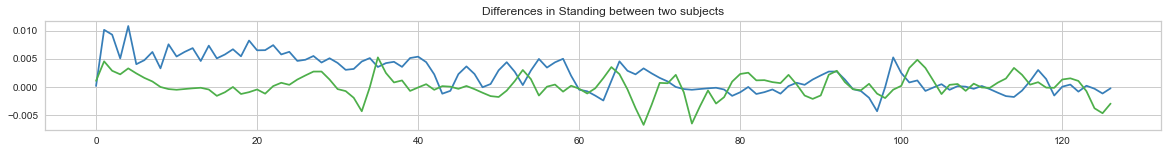

In [8]:
plt.figure(figsize=(20,2))#STANDING
plt.title("Differences in Standing between two subjects")
X_trainx[y_train['Activity']==5].iloc[0,:127].plot() 
X_trainx[y_train['Activity']==5].iloc[1,:127].plot()

<AxesSubplot:title={'center':'Differences in Wlaking between two subjects'}>

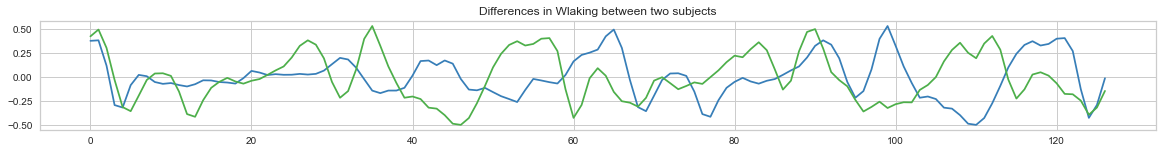

In [9]:
plt.figure(figsize=(20,2)) #WALKING
plt.title("Differences in Wlaking between two subjects")
X_trainx[y_train['Activity']==1].iloc[0,:127].plot() 
X_trainx[y_train['Activity']==1].iloc[1,:127].plot()

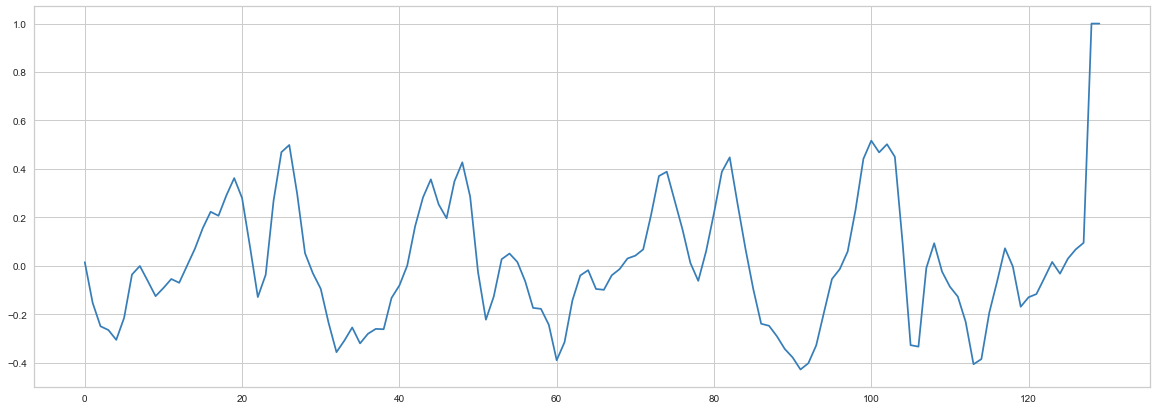

In [48]:
X_trainx.iloc[80].plot(figsize=(20,7))

plt.show()

In [13]:
print(f"Number of time series: {X_trainx.shape[0]}\nLength: {X_trainx.shape[1]}")

Number of time series: 7352
Length: 130


# Preprocessing

## 1. Amplitude scaling

In [22]:
!pip install tslearn

In [43]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [44]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
norm_df = scaler.fit_transform(dfx.iloc[:,:-1])

In [45]:
norm_df = norm_df.squeeze()

<function matplotlib.pyplot.show(close=None, block=None)>

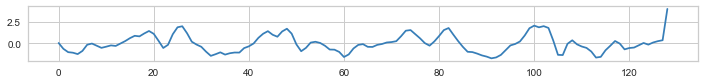

In [50]:
plt.figure(figsize=(12,1))
plt.plot(norm_df[80,:])

plt.show

In [51]:
norm_df = pd.DataFrame(norm_df)

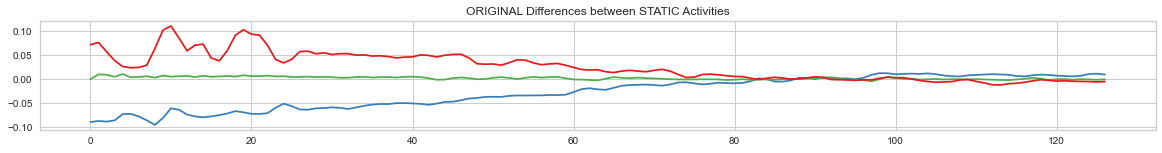

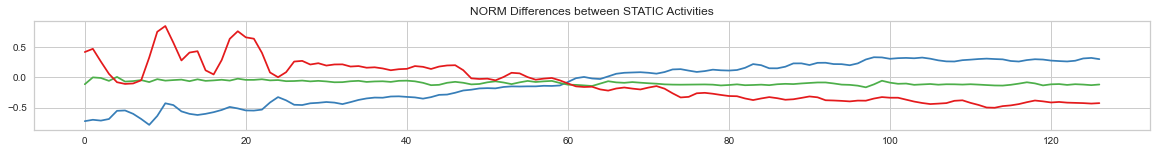

In [39]:
plt.figure(figsize=(20,2))
plt.title("ORIGINAL Differences between STATIC Activities")
X_trainx[y_train['Activity']==4].iloc[0,:127].plot()
X_trainx[y_train['Activity']==5].iloc[0,:127].plot()
X_trainx[y_train['Activity']==6].iloc[0,:127].plot()

plt.show()

plt.figure(figsize=(20,2))
plt.title("NORM Differences between STATIC Activities")
norm_df[y_train['Activity']==4].iloc[0,:127].plot()
norm_df[y_train['Activity']==5].iloc[0,:127].plot()
norm_df[y_train['Activity']==6].iloc[0,:127].plot()

plt.show()

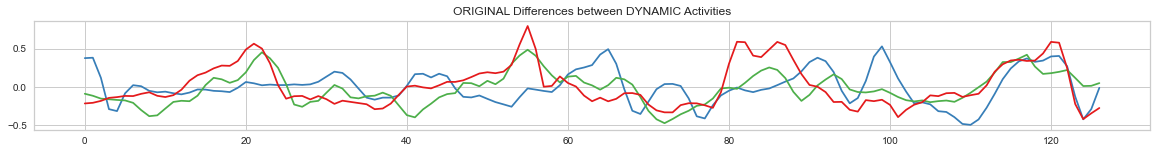

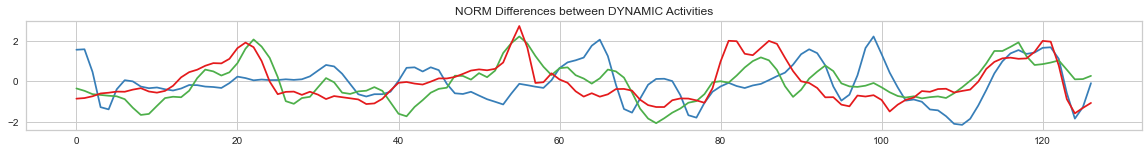

In [40]:
plt.figure(figsize=(20,2))
plt.title("ORIGINAL Differences between DYNAMIC Activities")
X_trainx[y_train['Activity']==1].iloc[0,:127].plot()
X_trainx[y_train['Activity']==2].iloc[0,:127].plot()
X_trainx[y_train['Activity']==3].iloc[0,:127].plot()

plt.show()

plt.figure(figsize=(20,2))
plt.title("NORM Differences between DYNAMIC Activities")
norm_df[y_train['Activity']==1].iloc[0,:127].plot()
norm_df[y_train['Activity']==2].iloc[0,:127].plot()
norm_df[y_train['Activity']==3].iloc[0,:127].plot()

plt.show()

## 2. Moving average - time window = 3

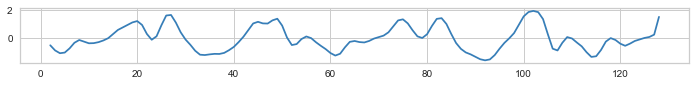

In [53]:
# test
w = 3
ts1 = norm_df.iloc[80,:]
plt.figure(figsize=(12,1))
plt.plot((ts1 - ts1.mean()/ts1.std()).rolling(window=w).mean())

In [54]:
# apply moving average to dataset
w = 3
for i in range(norm_df.shape[0]):
    norm_df.iloc[i,:] = (norm_df.iloc[i,:] - norm_df.iloc[i,:].mean()/norm_df.iloc[i,:].std()).rolling(window=w).mean()
norm_df.dropna(inplace=True, axis=1)
norm_df.head()

,2,3,4,5,6,7,8,9,10,11,...,119,120,121,122,123,124,125,126,127,128
0,-0.039649,-0.021050,-0.018493,-0.038407,-0.039581,-0.057081,-0.059893,-0.049177,-0.052248,-0.041151,...,-0.103127,-0.114391,-0.118109,-0.115480,-0.114843,-0.117642,-0.118895,-0.120608,-0.113468,3.698109
1,-0.057956,-0.053572,-0.058305,-0.060065,-0.062455,-0.071285,-0.080432,-0.087962,-0.093543,-0.094929,...,-0.088032,-0.086213,-0.079963,-0.075332,-0.083193,-0.103364,-0.125114,-0.133497,-0.125258,3.692796
2,-0.072712,-0.100336,-0.134505,-0.144875,-0.127887,-0.099863,-0.079681,-0.086060,-0.113210,-0.134436,...,-0.087187,-0.084686,-0.088696,-0.096798,-0.096984,-0.094939,-0.089141,-0.076094,-0.068365,3.727152
3,-0.102348,-0.094062,-0.090429,-0.088109,-0.085444,-0.096062,-0.133608,-0.177661,-0.182724,-0.131765,...,-0.087437,-0.077207,-0.075834,-0.084630,-0.097068,-0.106383,-0.108874,-0.106051,-0.099957,3.703531
4,-0.082959,-0.071415,-0.061707,-0.062227,-0.066761,-0.066812,-0.061638,-0.060716,-0.062693,-0.065835,...,-0.060788,-0.064112,-0.084207,-0.096612,-0.081414,-0.064749,-0.068358,-0.087260,-0.106082,3.695530


# Approximating Time Series

In [394]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

C:\Users\info\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 7352 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
C:\Users\info\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 7352 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


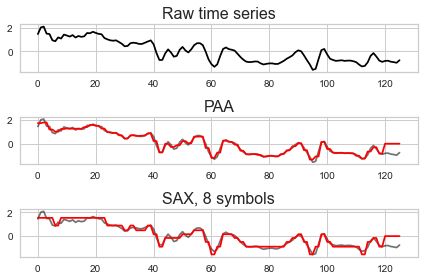

In [395]:
### PAA transform (and inverse transform) of the data
n_paa_segments = 60
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(norm_df)
paa_dataset_inv = paa.inverse_transform(ts_paa)

# SAX transform
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(norm_df)
sax_dataset_inv = sax.inverse_transform(ts_sax)

# PLOTTING FIRST TRACK 
plt.figure()
plt.subplot(3, 1, 1)  # First, raw time series
plt.plot(norm_df.iloc[0,:].ravel(), c="black")
plt.title("Raw time series", fontsize=16)

plt.subplot(3, 1, 2)  # Second, PAA
plt.plot(norm_df.iloc[0,:].ravel(), c="black", alpha=0.55)
plt.plot(paa_dataset_inv[0].ravel(), c="red")
plt.title("PAA",fontsize=16)

plt.subplot(3, 1, 3)  # Then SAX
plt.plot(norm_df.iloc[0,:].ravel(), c="black", alpha=0.55)
plt.plot(sax_dataset_inv[0].ravel(), c='red')
plt.title("SAX, %d symbols" % n_sax_symbols, fontsize=16)



plt.tight_layout()